In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/admin/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
crypto_data = Path('final_frame (1).csv')

crypto_features = pd.read_csv(crypto_data,index_col=0,infer_datetime_format=True,parse_dates=True)
crypto_features

,Central Bank Balance Sheet Size,GRDI,Bloomberg Commodity Index,Gold,Bitcoin,Bloomberg Dollar Index,Citi Dollar Positioning,Bitcoin - Story Count,Inflation - Story Count,VIX Index,...,US 2s10s,Sector Rotation,Citi Inflation Surprise,Citi EM Inflation Surprise,GBI Weighted CPI,Conference Board Inflation Expectations,US BUDGET BALANCE,US CPI,bitcoin: (Worldwide),inflation: (Worldwide)
2021-02-27,NaN,NaN,NaN,NaN,46864.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-26,35587.9688,113.313,85.2778,1734.04,45672.06,1135.36,-14.56,4615.0,3585.0,28.73,...,127.209,1.0633,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-25,35687.5117,114.041,87.1179,1770.56,48083.51,1127.87,-16.33,5310.0,3760.0,21.73,...,134.198,1.0531,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-24,35702.6563,119.915,87.5827,1805.06,48758.53,1120.74,-17.53,5900.0,3952.0,23.76,...,124.867,1.0733,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-23,35698.2070,118.636,86.6185,1805.73,47962.92,1122.74,-19.85,7362.0,4089.0,22.82,...,122.667,1.0602,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-22,35714.1250,118.579,86.6999,1809.67,54938.64,1123.74,-19.55,7333.0,3145.0,24.46,...,124.868,1.0600,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-21,NaN,NaN,NaN,NaN,57355.29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-20,35663.3633,NaN,NaN,NaN,56537.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-19,35648.4961,120.515,85.3002,1784.25,55629.08,1124.92,-25.42,7796.0,2733.0,23.10,...,122.547,1.0644,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65
2021-02-18,35587.8242,121.172,85.2395,1775.67,52037.53,1126.68,-22.76,5772.0,3150.0,21.98,...,118.668,1.0481,21.55,-2.61,4.0754,6.0,-15.28,1.4,65,65


In [3]:
crypto_features=crypto_features.sort_index(ascending=True)

In [4]:
crypto_features['BTC returns']=crypto_features['Bitcoin'].pct_change()

In [5]:
crypto_features=crypto_features.dropna()

In [6]:
crypto_features=crypto_features.drop("Bitcoin",1)
crypto_features["t+1"]=crypto_features['BTC returns'].shift(1)
crypto_features=crypto_features.dropna()
crypto_features=crypto_features.drop("BTC returns",1)

In [7]:
crypto_features['t+1']=crypto_features['t+1'].apply(lambda x: "increase" if x > 0  else "decrease")
crypto_features

,Central Bank Balance Sheet Size,GRDI,Bloomberg Commodity Index,Gold,Bloomberg Dollar Index,Citi Dollar Positioning,Bitcoin - Story Count,Inflation - Story Count,VIX Index,MOVE Index,...,Sector Rotation,Citi Inflation Surprise,Citi EM Inflation Surprise,GBI Weighted CPI,Conference Board Inflation Expectations,US BUDGET BALANCE,US CPI,bitcoin: (Worldwide),inflation: (Worldwide),t+1
2016-04-05,22406.5469,111.178,76.9725,1231.35,1186.14,35.07,0.0,2255.0,15.39,68.3119,...,0.7913,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,decrease
2016-04-06,22430.5977,112.074,77.6481,1222.47,1182.59,39.05,0.0,2044.0,15.61,69.7080,...,0.7862,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase
2016-04-07,22478.3398,109.475,77.4519,1240.45,1184.91,37.95,0.0,2742.0,15.14,71.0948,...,0.7834,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,decrease
2016-04-08,22565.7578,110.270,79.0288,1240.69,1179.20,41.14,0.0,2174.0,15.34,70.8799,...,0.7873,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase
2016-04-11,22607.1816,109.922,79.2825,1257.88,1174.16,44.61,0.0,2722.0,15.34,69.7667,...,0.7913,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,decrease
2016-04-12,22579.7324,111.562,80.8911,1255.63,1171.92,46.77,0.0,3643.0,15.98,68.7767,...,0.7946,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase
2016-04-13,22534.7363,113.137,81.2446,1242.47,1179.16,49.25,0.0,2577.0,14.49,67.4850,...,0.8033,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase
2016-04-14,22530.9141,113.231,80.6462,1227.89,1180.57,49.79,0.0,3037.0,13.90,67.5200,...,0.8048,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,decrease
2016-04-15,22572.2813,113.400,80.3927,1233.99,1178.78,55.81,0.0,1694.0,13.77,66.4853,...,0.8007,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase
2016-04-18,22578.8086,114.069,80.6782,1232.49,1176.18,55.99,0.0,1692.0,14.87,66.3398,...,0.8015,-15.32,-1.12,3.9074,4.8,-2.30,0.9,3,52,increase


In [8]:
X=crypto_features.drop('t+1',1)
y=crypto_features["t+1"]

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Stnadardized Data

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train.shape

(471, 22)

In [11]:
X_test.shape

(202, 22)

In [12]:
# Initialize PCA model
pca = PCA(n_components=11)

# Get eleven principal components for the data.
btc_pca = pca.fit_transform(X_train)

In [13]:
# Transform PCA data to a DataFrame
btc_df_pca = pd.DataFrame(
    data=btc_pca, columns=["principal component 1", "principal component 2","principal component 3","principal component 4","principal component 5","principal component 6","principal component 7","principal component 8","principal component 9","principal component 10","principal component 11"]
)
btc_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,-0.559639,-2.005684,2.791847,-0.319872,0.554292,0.890328,0.516766,0.220079,-0.343204,-0.079355,-0.492193
1,-1.914605,-2.290194,-0.775976,-0.682093,-1.170757,-0.020566,0.831519,0.290993,0.043764,-0.316768,0.039318
2,-0.353885,-0.682573,2.046152,-1.204745,0.515031,0.374658,0.222194,0.490658,-0.346100,0.804237,-0.029343
3,6.491826,-2.373518,-0.007165,3.900653,1.028618,0.940514,-1.247389,1.554320,0.714525,-0.446687,0.262807
4,-2.304087,-0.007350,-1.188257,0.282400,0.537169,0.169873,-0.280950,-0.415162,-0.454149,0.159670,0.145856


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_


array([0.38527884, 0.17807191, 0.12620396, 0.09771213, 0.03992321,
       0.03587858, 0.02898291, 0.02455401, 0.02095988, 0.0184367 ,
       0.0120089 ])

In [15]:
X_train.shape

(471, 22)

In [16]:
btc_pca.shape

(471, 11)

In [17]:
pca.components_

array([[ 0.33846306, -0.03925518, -0.18897671,  0.32289109, -0.16563148,
        -0.2498969 ,  0.28460067, -0.06630027,  0.15205126, -0.16499079,
        -0.15058694, -0.20272731, -0.06912028,  0.27388901,  0.23537826,
        -0.18455854, -0.15536252,  0.26456304, -0.3294018 , -0.10913434,
         0.23882074,  0.11704356],
       [ 0.03424677, -0.47325953, -0.32785043,  0.1252689 ,  0.30210786,
         0.10970777,  0.04851606, -0.16848538,  0.3933445 ,  0.29986394,
         0.26192408, -0.25580525, -0.05181215, -0.21555102, -0.14374302,
         0.07979968, -0.19696856, -0.02432502,  0.03513549, -0.10457769,
        -0.1043748 ,  0.01786771],
       [ 0.00559596,  0.09895771, -0.21286741,  0.02075186,  0.20872842,
         0.03251307,  0.24754358, -0.18112189,  0.0987472 ,  0.05231332,
        -0.36570984,  0.31781871, -0.4711805 ,  0.06329303, -0.15184639,
        -0.10617769,  0.03234164, -0.26703922,  0.08923806,  0.39961302,
         0.02131393,  0.2401517 ],
       [ 0.03000672

In [19]:
factors_corr = crypto_features.corr()

In [20]:
mask = np.zeros_like(factors_corr.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True


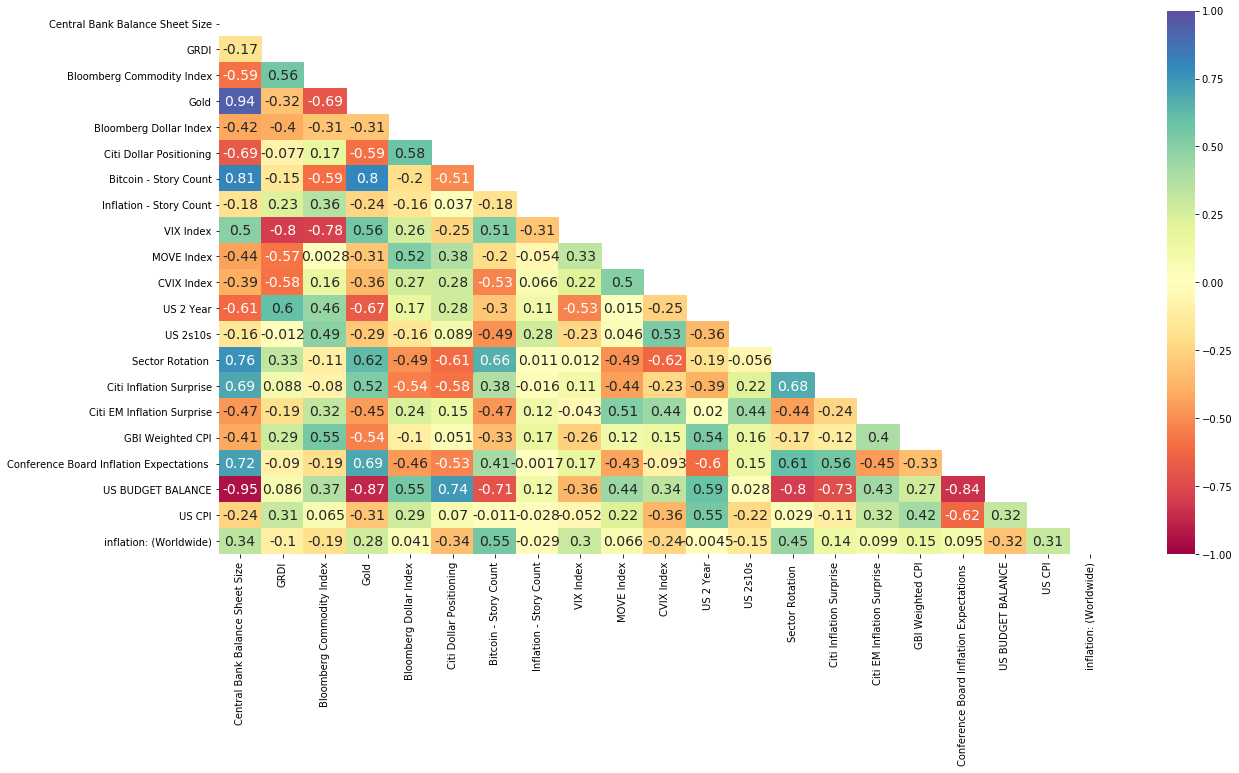

In [21]:
import seaborn as sns
import numpy as np
#map = pd.DataFrame(pca.components_,columns=X.columns)
mask = np.zeros_like(factors_corr.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.subplots(figsize=(20,10))
sns.heatmap(factors_corr, vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={"size":14}, cmap='Spectral')


In [22]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# y_train=y_train.astype(int)
# y_test=y_test.astype(int)
classifier = RandomForestClassifier(max_depth = 4 ,random_state=0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print( accuracy_score(y_test, y_pred))

[[ 18  64]
 [ 12 108]]
0.6237623762376238


In [25]:
y_pred

array(['decrease', 'decrease', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'decrease', 'increase',
       'increase', 'decrease', 'increase', 'increase', 'increase',
       'increase', 'decrease', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'decrease', 'increase',
       'increase', 'increase', 'decrease', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'decrease', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'decrease', 'increase', 'increase', 'increase',
       'increase', 'increase', 'decrease', 'increase', 'increa

In [26]:
y_test

2020-08-27    increase
2020-06-18    decrease
2020-04-16    decrease
2019-09-30    increase
2016-04-25    decrease
2016-07-18    increase
2019-03-11    decrease
2020-03-16    decrease
2020-01-17    decrease
2020-03-13    decrease
2019-03-28    increase
2020-01-31    increase
2017-08-08    increase
2019-03-01    increase
2017-07-12    decrease
2017-07-17    decrease
2019-11-06    decrease
2016-08-03    decrease
2020-01-21    increase
2020-12-29    increase
2017-09-12    decrease
2019-10-11    decrease
2020-07-24    increase
2020-08-06    increase
2020-02-21    decrease
2016-05-25    increase
2017-09-21    increase
2020-10-19    decrease
2017-04-03    increase
2020-02-06    increase
                ...   
2021-01-12    decrease
2019-10-29    decrease
2019-10-18    increase
2020-02-24    increase
2018-12-31    increase
2020-11-24    decrease
2019-10-30    decrease
2017-09-20    decrease
2021-02-25    increase
2016-08-24    decrease
2020-10-15    decrease
2019-02-28    decrease
2016-10-06 

In [27]:
X_train2, X_test2,y_train2,y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [29]:
X_train2.shape

(471, 22)

In [30]:
# Initialize PCA model
pca_2 = PCA(n_components=5)

# Get five principal components for the data.
btc_pca_2 = pca_2.fit_transform(X_train2)

# Transform PCA data to a DataFrame
btc_df_pca_2 = pd.DataFrame(
    data=btc_pca_2, columns=["principal component 1", "principal component 2","principal component 3","principal component 4","principal component 5"]
)
btc_df_pca_2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.559639,-2.005684,2.791847,-0.319872,0.554292
1,-1.914605,-2.290194,-0.775976,-0.682093,-1.170757
2,-0.353885,-0.682573,2.046152,-1.204745,0.515031
3,6.491826,-2.373518,-0.007165,3.900653,1.028618
4,-2.304087,-0.007350,-1.188257,0.282400,0.537169


In [31]:
# Fetch the explained variance
pca_2.explained_variance_ratio_


array([0.38527884, 0.17807191, 0.12620396, 0.09771213, 0.03992321])

In [32]:
pca_2.components_

array([[ 0.33846306, -0.03925518, -0.18897671,  0.32289109, -0.16563148,
        -0.2498969 ,  0.28460067, -0.06630027,  0.15205126, -0.16499079,
        -0.15058694, -0.20272731, -0.06912028,  0.27388901,  0.23537826,
        -0.18455854, -0.15536252,  0.26456304, -0.3294018 , -0.10913434,
         0.23882074,  0.11704356],
       [ 0.03424677, -0.47325953, -0.32785043,  0.1252689 ,  0.30210786,
         0.10970777,  0.04851606, -0.16848538,  0.3933445 ,  0.29986394,
         0.26192408, -0.25580525, -0.05181215, -0.21555102, -0.14374302,
         0.07979968, -0.19696856, -0.02432502,  0.03513549, -0.10457769,
        -0.1043748 ,  0.01786771],
       [ 0.00559596,  0.09895771, -0.21286741,  0.02075186,  0.20872842,
         0.03251307,  0.24754358, -0.18112189,  0.0987472 ,  0.05231332,
        -0.36570984,  0.31781871, -0.4711805 ,  0.06329303, -0.15184639,
        -0.10617769,  0.03234164, -0.26703922,  0.08923806,  0.39961302,
         0.02131393,  0.2401517 ],
       [ 0.03000672

In [36]:
#map= pd.DataFrame(pca_2.components_,columns=X.columns)
#plt.figure(figsize=(12,6))
#sns.heatmap(map,cmap='twilight')

In [34]:
# y_train2=y_train2.astype(int)
# y_test2=y_test2.astype(int)
classifier2 = RandomForestClassifier(max_depth = 4,random_state=0)
classifier2.fit(X_train2,y_train2)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)

In [37]:
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)
print(f"The accuracy score is: {accuracy_score(y_test2, y_pred2)}")

[[ 17  65]
 [ 14 106]]
The accuracy score is: 0.6089108910891089
